In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn import metrics
from sklearn import tree

In [2]:
dataset=pd.read_csv(r"C:\Users\admin\Downloads\Employee.csv")
dataset

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


# EDA

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

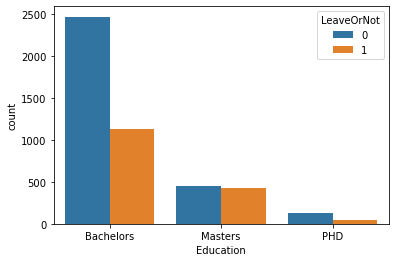

In [4]:
sns.countplot(dataset['Education'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

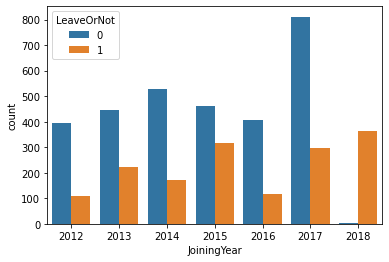

In [5]:
sns.countplot(dataset['JoiningYear'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='count'>

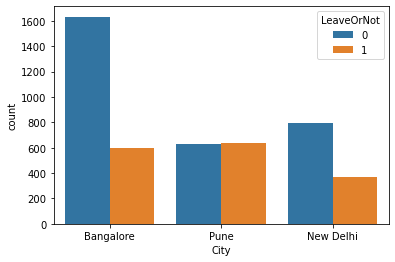

In [6]:
sns.countplot(dataset['City'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

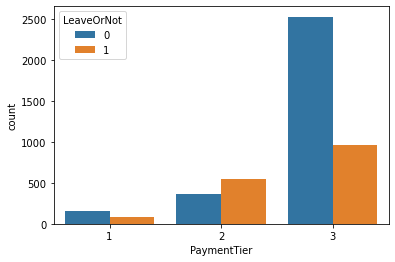

In [7]:
sns.countplot(dataset['PaymentTier'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LeaveOrNot', ylabel='Age'>

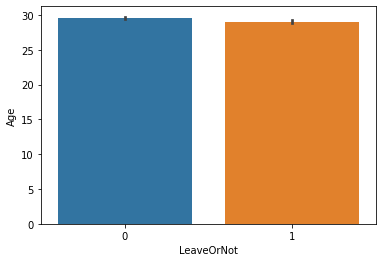

In [8]:
sns.barplot(dataset['LeaveOrNot'],dataset['Age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

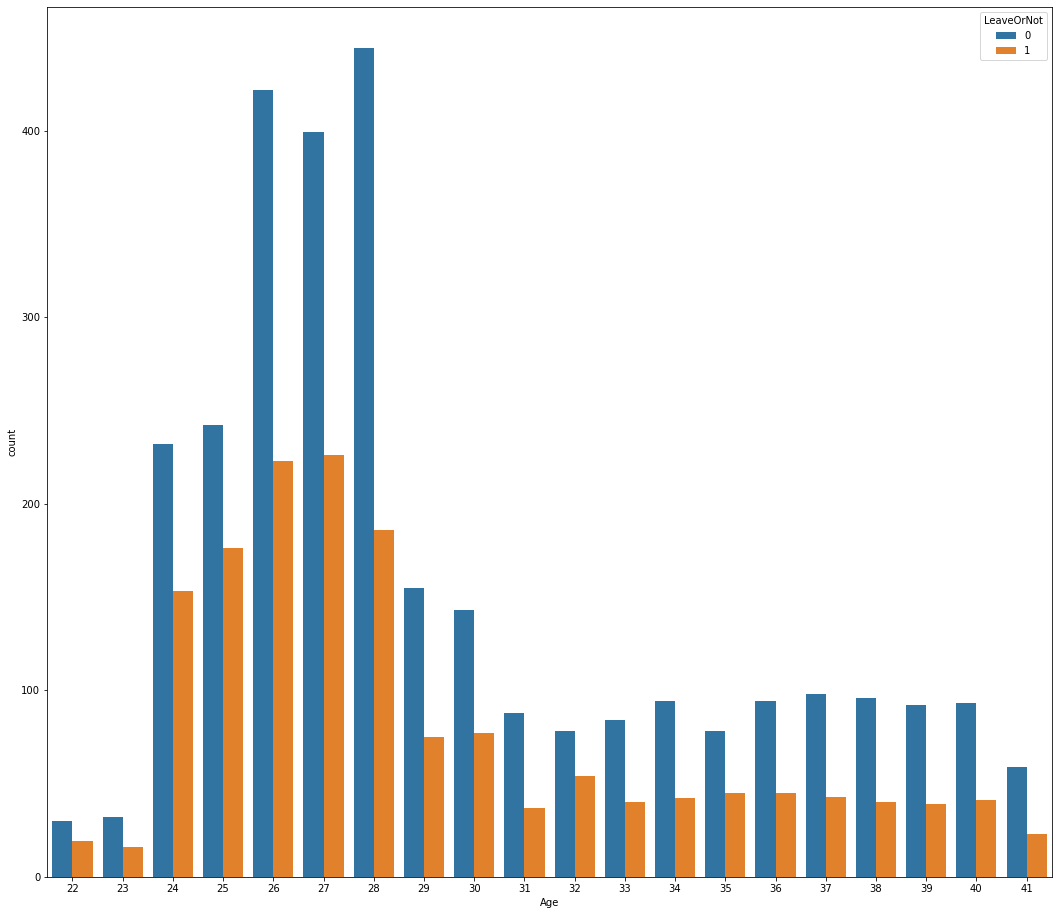

In [9]:
plt.figure(figsize=(18,16))
sns.countplot(dataset['Age'],hue=dataset['LeaveOrNot'])

In [10]:
age=[]
for x in dataset['Age']:
    if x>=21 and x<31:
        age.append("Young")
    else:
        age.append("Adult")
print(age)

['Adult', 'Young', 'Adult', 'Young', 'Young', 'Young', 'Adult', 'Adult', 'Young', 'Adult', 'Young', 'Adult', 'Adult', 'Adult', 'Adult', 'Young', 'Adult', 'Adult', 'Young', 'Young', 'Adult', 'Young', 'Adult', 'Young', 'Young', 'Young', 'Adult', 'Young', 'Adult', 'Young', 'Young', 'Young', 'Young', 'Adult', 'Adult', 'Young', 'Young', 'Adult', 'Young', 'Young', 'Adult', 'Young', 'Young', 'Adult', 'Adult', 'Young', 'Young', 'Adult', 'Adult', 'Young', 'Adult', 'Young', 'Adult', 'Adult', 'Adult', 'Young', 'Adult', 'Adult', 'Adult', 'Adult', 'Young', 'Young', 'Young', 'Young', 'Adult', 'Adult', 'Young', 'Young', 'Young', 'Adult', 'Young', 'Adult', 'Young', 'Young', 'Young', 'Adult', 'Young', 'Young', 'Adult', 'Adult', 'Adult', 'Adult', 'Adult', 'Young', 'Young', 'Adult', 'Young', 'Adult', 'Young', 'Adult', 'Young', 'Young', 'Adult', 'Adult', 'Adult', 'Young', 'Adult', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 'Young', 

In [11]:
dataset.insert(0,"AGE",age)

In [12]:
dataset

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Adult,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Young,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Adult,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Young,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Young,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...,...
4648,Young,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Adult,Masters,2013,Pune,2,37,Male,No,2,1
4650,Young,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Young,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [13]:
dataset['AGE'].value_counts()

Young    3250
Adult    1403
Name: AGE, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE', ylabel='count'>

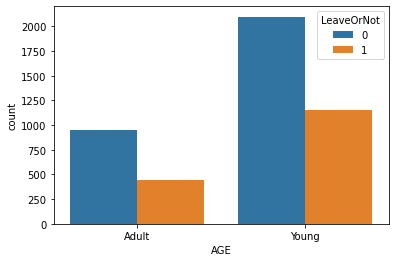

In [14]:
sns.countplot(dataset['AGE'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

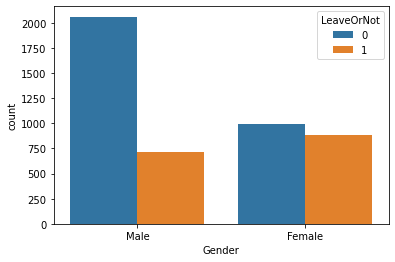

In [15]:
sns.countplot(dataset['Gender'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EverBenched', ylabel='count'>

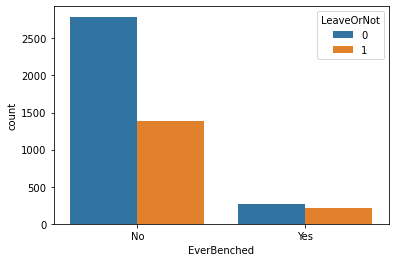

In [16]:
sns.countplot(dataset['EverBenched'],hue=dataset['LeaveOrNot'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

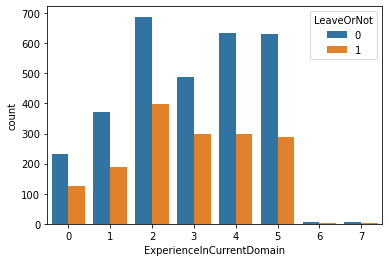

In [17]:
sns.countplot(dataset['ExperienceInCurrentDomain'],hue=dataset['LeaveOrNot'])

# 1.Find the No. Female Employees from Banglore leaving (198)

In [18]:
dataset.loc[(dataset['City']=='Bangalore') &  (dataset['Gender']=='Female') & (dataset['LeaveOrNot']==1)]

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
7,Adult,Bachelors,2016,Bangalore,3,34,Female,No,2,1
69,Adult,Masters,2017,Bangalore,3,40,Female,No,2,1
70,Young,Bachelors,2018,Bangalore,3,23,Female,No,1,1
81,Adult,Bachelors,2013,Bangalore,3,31,Female,No,0,1
84,Young,Bachelors,2015,Bangalore,3,27,Female,Yes,5,1
...,...,...,...,...,...,...,...,...,...,...
4560,Young,Bachelors,2015,Bangalore,3,25,Female,No,3,1
4594,Adult,Bachelors,2013,Bangalore,3,36,Female,No,0,1
4612,Young,Bachelors,2012,Bangalore,3,23,Female,No,1,1
4632,Adult,Bachelors,2018,Bangalore,3,31,Female,No,2,1


# 2.Total how many employees are leaved(1600)

In [19]:
dataset.loc[(dataset['LeaveOrNot']==1) ]

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1,Young,Bachelors,2013,Pune,1,28,Female,No,3,1
3,Young,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Young,Masters,2017,Pune,3,24,Male,Yes,2,1
7,Adult,Bachelors,2016,Bangalore,3,34,Female,No,2,1
10,Young,Masters,2012,Bangalore,3,27,Male,No,5,1
...,...,...,...,...,...,...,...,...,...,...
4639,Young,Bachelors,2017,Bangalore,3,28,Male,No,0,1
4641,Adult,Bachelors,2016,Bangalore,1,33,Female,No,0,1
4644,Adult,Bachelors,2015,Pune,3,32,Female,Yes,1,1
4649,Adult,Masters,2013,Pune,2,37,Male,No,2,1


# 3.No.of employees leaving from tier 1 tier2 tier3

In [20]:
d=dataset.loc[(dataset['LeaveOrNot']==1)]
d

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1,Young,Bachelors,2013,Pune,1,28,Female,No,3,1
3,Young,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Young,Masters,2017,Pune,3,24,Male,Yes,2,1
7,Adult,Bachelors,2016,Bangalore,3,34,Female,No,2,1
10,Young,Masters,2012,Bangalore,3,27,Male,No,5,1
...,...,...,...,...,...,...,...,...,...,...
4639,Young,Bachelors,2017,Bangalore,3,28,Male,No,0,1
4641,Adult,Bachelors,2016,Bangalore,1,33,Female,No,0,1
4644,Adult,Bachelors,2015,Pune,3,32,Female,Yes,1,1
4649,Adult,Masters,2013,Pune,2,37,Male,No,2,1


In [21]:
r=d.loc[d['JoiningYear']==2018]
r

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
12,Adult,Bachelors,2018,Pune,3,32,Male,Yes,5,1
32,Young,Bachelors,2018,Bangalore,3,26,Male,No,4,1
37,Adult,Bachelors,2018,New Delhi,2,34,Female,No,0,1
65,Adult,Bachelors,2018,Bangalore,3,40,Male,No,1,1
70,Young,Bachelors,2018,Bangalore,3,23,Female,No,1,1
...,...,...,...,...,...,...,...,...,...,...
4598,Adult,Bachelors,2018,Bangalore,3,31,Male,No,0,1
4631,Adult,Bachelors,2018,Bangalore,3,32,Male,Yes,1,1
4632,Adult,Bachelors,2018,Bangalore,3,31,Female,No,2,1
4637,Adult,Bachelors,2018,Bangalore,3,32,Male,Yes,2,1


In [22]:
r['AGE'].value_counts()

Young    245
Adult    117
Name: AGE, dtype: int64

In [23]:
r['Education'].value_counts()

Bachelors    259
Masters       74
PHD           29
Name: Education, dtype: int64

In [24]:
r['City'].value_counts()

Bangalore    200
New Delhi     86
Pune          76
Name: City, dtype: int64

In [25]:
r['PaymentTier'].value_counts()

3    341
2     18
1      3
Name: PaymentTier, dtype: int64

In [26]:
r['ExperienceInCurrentDomain'].value_counts()

2    110
4     68
3     63
5     61
1     35
0     23
6      2
Name: ExperienceInCurrentDomain, dtype: int64

In [27]:
r['EverBenched'].value_counts()

No     283
Yes     79
Name: EverBenched, dtype: int64

In [28]:
r['Gender'].value_counts()

Male      235
Female    127
Name: Gender, dtype: int64

In [29]:
# female

In [30]:
f=d.loc[d['Gender']=='Female']
f

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1,Young,Bachelors,2013,Pune,1,28,Female,No,3,1
7,Adult,Bachelors,2016,Bangalore,3,34,Female,No,2,1
18,Young,Bachelors,2015,Pune,2,30,Female,No,0,1
19,Young,Bachelors,2016,New Delhi,2,22,Female,No,0,1
28,Adult,Bachelors,2013,Pune,2,31,Female,No,2,1
...,...,...,...,...,...,...,...,...,...,...
4632,Adult,Bachelors,2018,Bangalore,3,31,Female,No,2,1
4634,Adult,Bachelors,2016,New Delhi,1,38,Female,No,2,1
4636,Adult,Masters,2014,New Delhi,3,37,Female,No,0,1
4641,Adult,Bachelors,2016,Bangalore,1,33,Female,No,0,1


In [31]:
f['AGE'].value_counts()

Young    625
Adult    259
Name: AGE, dtype: int64

In [32]:
f['Education'].value_counts()

Bachelors    698
Masters      168
PHD           18
Name: Education, dtype: int64

In [33]:
f['JoiningYear'].value_counts()

2015    262
2017    156
2018    127
2013    120
2014    100
2016     63
2012     56
Name: JoiningYear, dtype: int64

In [34]:
f['City'].value_counts()

Pune         491
Bangalore    198
New Delhi    195
Name: City, dtype: int64

In [35]:
f['PaymentTier'].value_counts()

2    425
3    390
1     69
Name: PaymentTier, dtype: int64

In [36]:
f['EverBenched'].value_counts()

No     776
Yes    108
Name: EverBenched, dtype: int64

In [37]:
f['ExperienceInCurrentDomain'].value_counts()

2    219
4    169
3    161
5    159
1    105
0     69
7      1
6      1
Name: ExperienceInCurrentDomain, dtype: int64

In [38]:
d['PaymentTier'].value_counts()

3    961
2    550
1     89
Name: PaymentTier, dtype: int64

In [39]:
t=d.loc[d['PaymentTier']==3]
t

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
3,Young,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Young,Masters,2017,Pune,3,24,Male,Yes,2,1
7,Adult,Bachelors,2016,Bangalore,3,34,Female,No,2,1
10,Young,Masters,2012,Bangalore,3,27,Male,No,5,1
12,Adult,Bachelors,2018,Pune,3,32,Male,Yes,5,1
...,...,...,...,...,...,...,...,...,...,...
4636,Adult,Masters,2014,New Delhi,3,37,Female,No,0,1
4637,Adult,Bachelors,2018,Bangalore,3,32,Male,Yes,2,1
4639,Young,Bachelors,2017,Bangalore,3,28,Male,No,0,1
4644,Adult,Bachelors,2015,Pune,3,32,Female,Yes,1,1


In [40]:
t['AGE'].value_counts()

Young    684
Adult    277
Name: AGE, dtype: int64

In [41]:
t['Education'].value_counts()

Bachelors    671
Masters      255
PHD           35
Name: Education, dtype: int64

In [42]:
t['JoiningYear'].value_counts()

2018    341
2015    124
2017    119
2013    114
2014    109
2012     78
2016     76
Name: JoiningYear, dtype: int64

In [43]:
t['EverBenched'].value_counts()

No     828
Yes    133
Name: EverBenched, dtype: int64

In [44]:
t['City'].value_counts()

Bangalore    529
Pune         219
New Delhi    213
Name: City, dtype: int64

In [45]:
c=d.loc[d['City']=='Pune']
c

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1,Young,Bachelors,2013,Pune,1,28,Female,No,3,1
4,Young,Masters,2017,Pune,3,24,Male,Yes,2,1
12,Adult,Bachelors,2018,Pune,3,32,Male,Yes,5,1
18,Young,Bachelors,2015,Pune,2,30,Female,No,0,1
28,Adult,Bachelors,2013,Pune,2,31,Female,No,2,1
...,...,...,...,...,...,...,...,...,...,...
4610,Young,Bachelors,2015,Pune,3,24,Female,No,2,1
4620,Adult,Bachelors,2015,Pune,2,38,Female,No,4,1
4630,Young,Bachelors,2012,Pune,3,25,Female,No,3,1
4644,Adult,Bachelors,2015,Pune,3,32,Female,Yes,1,1


In [46]:
c['AGE'].value_counts()

Young    465
Adult    174
Name: AGE, dtype: int64

In [47]:
c['Education'].value_counts()

Bachelors    539
Masters       96
PHD            4
Name: Education, dtype: int64

In [48]:
c['JoiningYear'].value_counts()

2015    221
2017    107
2013     79
2014     78
2018     76
2016     40
2012     38
Name: JoiningYear, dtype: int64

In [49]:
c['PaymentTier'].value_counts()

2    371
3    219
1     49
Name: PaymentTier, dtype: int64

In [50]:
c['Gender'].value_counts()

Female    491
Male      148
Name: Gender, dtype: int64

In [51]:
c['EverBenched'].value_counts()

No     550
Yes     89
Name: EverBenched, dtype: int64

In [52]:
n=d.loc[d['City']=='Bangalore']
n

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
3,Young,Masters,2016,Bangalore,3,27,Male,No,5,1
7,Adult,Bachelors,2016,Bangalore,3,34,Female,No,2,1
10,Young,Masters,2012,Bangalore,3,27,Male,No,5,1
32,Young,Bachelors,2018,Bangalore,3,26,Male,No,4,1
42,Young,Bachelors,2013,Bangalore,3,30,Male,No,3,1
...,...,...,...,...,...,...,...,...,...,...
4631,Adult,Bachelors,2018,Bangalore,3,32,Male,Yes,1,1
4632,Adult,Bachelors,2018,Bangalore,3,31,Female,No,2,1
4637,Adult,Bachelors,2018,Bangalore,3,32,Male,Yes,2,1
4639,Young,Bachelors,2017,Bangalore,3,28,Male,No,0,1


In [53]:
n['AGE'].value_counts()

Young    415
Adult    180
Name: AGE, dtype: int64

In [54]:
n['JoiningYear'].value_counts()

2018    200
2013     82
2014     73
2017     69
2015     66
2016     56
2012     49
Name: JoiningYear, dtype: int64

# 4.finding the pattern of employees from tier 3 which are leaved

In [55]:
d1=d.loc[d['PaymentTier']==3]
d1

,AGE,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
3,Young,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Young,Masters,2017,Pune,3,24,Male,Yes,2,1
7,Adult,Bachelors,2016,Bangalore,3,34,Female,No,2,1
10,Young,Masters,2012,Bangalore,3,27,Male,No,5,1
12,Adult,Bachelors,2018,Pune,3,32,Male,Yes,5,1
...,...,...,...,...,...,...,...,...,...,...
4636,Adult,Masters,2014,New Delhi,3,37,Female,No,0,1
4637,Adult,Bachelors,2018,Bangalore,3,32,Male,Yes,2,1
4639,Young,Bachelors,2017,Bangalore,3,28,Male,No,0,1
4644,Adult,Bachelors,2015,Pune,3,32,Female,Yes,1,1


In [56]:
d1['EverBenched'].value_counts()

No     828
Yes    133
Name: EverBenched, dtype: int64

In [57]:
d1['AGE'].value_counts()

Young    684
Adult    277
Name: AGE, dtype: int64

In [58]:
d1['JoiningYear'].value_counts()

2018    341
2015    124
2017    119
2013    114
2014    109
2012     78
2016     76
Name: JoiningYear, dtype: int64

In [59]:
d1['Education'].value_counts()

Bachelors    671
Masters      255
PHD           35
Name: Education, dtype: int64

In [60]:
d1['City'].value_counts()

Bangalore    529
Pune         219
New Delhi    213
Name: City, dtype: int64

In [61]:
d1['ExperienceInCurrentDomain'].value_counts()

2    238
3    183
5    177
4    169
1    120
0     69
7      3
6      2
Name: ExperienceInCurrentDomain, dtype: int64

Most of the employee who leaved having experience more than year & they are young(21-31yr) & Most of them are Bachelores

In [62]:
del dataset['AGE']

In [63]:
l1=LabelEncoder()
dataset['Education']=l1.fit_transform(dataset['Education'])
dataset['JoiningYear']=l1.fit_transform(dataset['JoiningYear'])
dataset['City']=l1.fit_transform(dataset['City'])
dataset['Gender']=l1.fit_transform(dataset['Gender'])
dataset['EverBenched']=l1.fit_transform(dataset['EverBenched'])

In [64]:
dataset

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,3,34,1,0,0,0
1,0,1,2,1,28,0,0,3,1
2,0,2,1,3,38,0,0,2,0
3,1,4,0,3,27,1,0,5,1
4,1,5,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,1,0,3,26,0,0,4,0
4649,1,1,2,2,37,1,0,2,1
4650,1,6,1,3,27,1,0,5,1
4651,0,0,0,3,30,1,1,2,0


In [65]:
dataset

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,3,34,1,0,0,0
1,0,1,2,1,28,0,0,3,1
2,0,2,1,3,38,0,0,2,0
3,1,4,0,3,27,1,0,5,1
4,1,5,2,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,1,0,3,26,0,0,4,0
4649,1,1,2,2,37,1,0,2,1
4650,1,6,1,3,27,1,0,5,1
4651,0,0,0,3,30,1,1,2,0


In [66]:
dataset['LeaveOrNot'].value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

<AxesSubplot:>

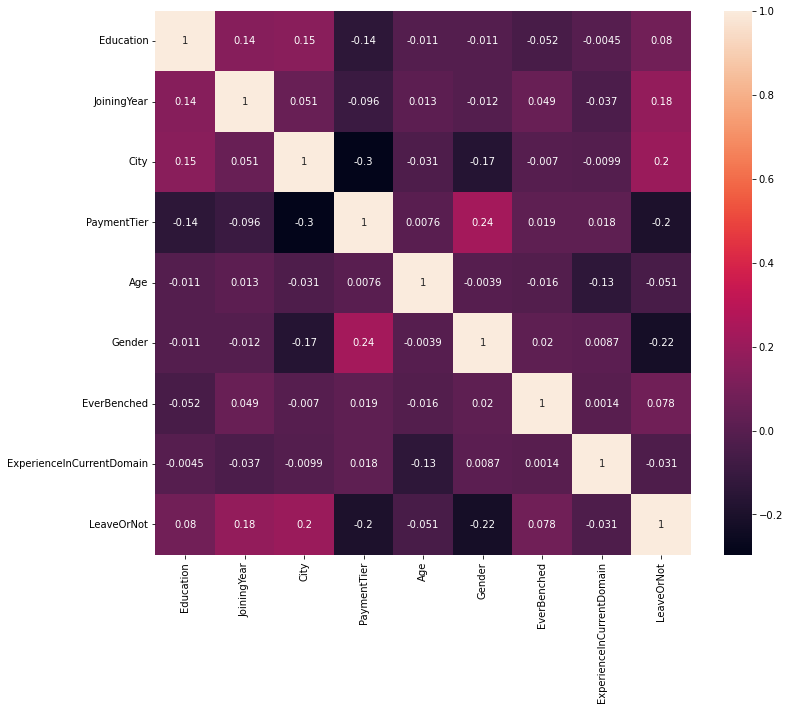

In [67]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),annot=True)

In [68]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [69]:
x

array([[0, 5, 0, ..., 1, 0, 0],
       [0, 1, 2, ..., 0, 0, 3],
       [0, 2, 1, ..., 0, 0, 2],
       ...,
       [1, 6, 1, ..., 1, 0, 5],
       [0, 0, 0, ..., 1, 1, 2],
       [0, 3, 0, ..., 1, 1, 4]], dtype=int64)

In [70]:
x.min()

0

In [71]:
x.max()

41

In [72]:
mas=MaxAbsScaler()
X=mas.fit_transform(x)

In [73]:
X.min()

0.0

In [74]:
X.max()

1.0

In [75]:
scaler=StandardScaler()
X1=scaler.fit_transform(X)

In [76]:
X1.mean().round(2)

0.0

In [77]:
X1.var()

1.0

In [78]:
print(Counter(y))

Counter({0: 3053, 1: 1600})


In [79]:
s=SMOTE()
x_data,y_data=s.fit_resample(X1,y)

In [80]:
print(Counter(y_data))

Counter({0: 3053, 1: 3053})


In [81]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=55)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print(Counter(y_test))

(4884, 8)
(1222, 8)
(4884,)
(1222,)
Counter({1: 623, 0: 599})


# Logistic

In [82]:
logs=LogisticRegression()
logs.fit(x_train,y_train)
l_pred=logs.predict(x_test)
l_ac=accuracy_score(y_test,l_pred)*100
l_cm=confusion_matrix(y_test,l_pred)
l_cr=classification_report(y_test,l_pred)



print("Accurcay_score_logs: ",l_ac.round(2))
print("Classification_matrix: ",l_cm)
print("Report: ",l_cr)

Accurcay_score_logs:  64.89
Classification_matrix:  [[377 222]
 [207 416]]
Report:                precision    recall  f1-score   support

           0       0.65      0.63      0.64       599
           1       0.65      0.67      0.66       623

    accuracy                           0.65      1222
   macro avg       0.65      0.65      0.65      1222
weighted avg       0.65      0.65      0.65      1222



# SVM

In [83]:
s1=SVC()
s1.fit(x_train,y_train)
s_pred=s1.predict(x_test)
s_ac=accuracy_score(y_test,s_pred)*100
s_cm=confusion_matrix(y_test,s_pred)
s_cr=classification_report(y_test,s_pred)



print("Accurcay_score_svm: ",s_ac.round(2))
print("Classification_matrix: ",s_cm)
print("Report: ",s_cr)

Accurcay_score_svm:  82.32
Classification_matrix:  [[526  73]
 [143 480]]
Report:                precision    recall  f1-score   support

           0       0.79      0.88      0.83       599
           1       0.87      0.77      0.82       623

    accuracy                           0.82      1222
   macro avg       0.83      0.82      0.82      1222
weighted avg       0.83      0.82      0.82      1222



# KNN

In [84]:
k1=KNeighborsClassifier()
k1.fit(x_train,y_train)
k_pred=k1.predict(x_test)
k_ac=accuracy_score(y_test,k_pred)*100
k_cm=confusion_matrix(y_test,k_pred)
k_cr=classification_report(y_test,k_pred)



print("Accurcay_score_knn: ",k_ac.round(2))
print("Classification_matrix: ",k_cm)
print("Report: ",k_cr)

Accurcay_score_knn:  80.93
Classification_matrix:  [[484 115]
 [118 505]]
Report:                precision    recall  f1-score   support

           0       0.80      0.81      0.81       599
           1       0.81      0.81      0.81       623

    accuracy                           0.81      1222
   macro avg       0.81      0.81      0.81      1222
weighted avg       0.81      0.81      0.81      1222



# DecisionTree

In [85]:
dt=DecisionTreeClassifier()
ft=dt.fit(x_train,y_train)
d_pred=dt.predict(x_test)
d_ac=accuracy_score(y_test,d_pred)*100
d_cm=confusion_matrix(y_test,d_pred)
d_cr=classification_report(y_test,d_pred)



print("Accurcay_score_tree: ",d_ac.round(2))
print("Classification_matrix: ",d_cm)
print("Report: ",d_cr)

Accurcay_score_tree:  82.98
Classification_matrix:  [[512  87]
 [121 502]]
Report:                precision    recall  f1-score   support

           0       0.81      0.85      0.83       599
           1       0.85      0.81      0.83       623

    accuracy                           0.83      1222
   macro avg       0.83      0.83      0.83      1222
weighted avg       0.83      0.83      0.83      1222



## Cross Validation

In [86]:
skf=StratifiedKFold(n_splits=3,shuffle=True,random_state=55)
skf.get_n_splits(x_data,y_data)
print(skf)

StratifiedKFold(n_splits=3, random_state=55, shuffle=True)


In [87]:
for train,test in skf.split(x_data,y_data):
    X_Train,X_Test=x_data[train],x_data[test]
    Y_Train,Y_Test=y_data[train],y_data[test]
    
    # Log
    sco=cross_val_score(logs,X_Train,Y_Train,cv=skf)
    pre=cross_val_predict(logs,X_Test,Y_Test,cv=skf)
    l_ac_1=accuracy_score(Y_Test,pre)*100
    l_cm_1=confusion_matrix(Y_Test,pre)
    l_cr_1=classification_report(Y_Test,pre)
    
    # SVM
    sco1=cross_val_score(s1,X_Train,Y_Train,cv=skf)
    pre1=cross_val_predict(s1,X_Test,Y_Test,cv=skf)
    s_ac_1=accuracy_score(Y_Test,pre1)*100
    s_cm_1=confusion_matrix(Y_Test,pre1)
    s_cr_1=classification_report(Y_Test,pre1)
    
    # KNN
    sco2=cross_val_score(k1,X_Train,Y_Train,cv=skf)
    pre2=cross_val_predict(k1,X_Test,Y_Test,cv=skf)
    k_ac_1=accuracy_score(Y_Test,pre2)*100
    k_cm_1=confusion_matrix(Y_Test,pre2)
    k_cr_1=classification_report(Y_Test,pre2)
    
    # DecisionTree
    sco3=cross_val_score(dt,X_Train,Y_Train,cv=skf)
    pre3=cross_val_predict(dt,X_Test,Y_Test,cv=skf)
    d_ac_1=accuracy_score(Y_Test,pre3)*100
    d_cm_=confusion_matrix(Y_Test,pre3)
    d_cr_1=classification_report(Y_Test,pre3)
    
    print("Checking Balancing", Counter(Y_Test))
    print("Accurcacy_log:",l_ac_1,  "Accurcacy_svm:",s_ac_1,   "Accurcacy_knn:",k_ac_1,  "Accurcacy_tree:",d_ac_1)
    print("Matrix_log:",l_cm_1,  "Matrix_svm:",s_cm_1,  "Matrix_knn:",k_cm_1,  "Matrix_tree:",l_cm_1)
    print("Report_log:",l_cr_1,  "Report_svm:",s_cr_1,  "Report_knn:",k_cr_1,  "Report_tree:",d_cr_1)

Checking Balancing Counter({1: 1018, 0: 1018})
Accurcacy_log: 65.71709233791748 Accurcacy_svm: 77.16110019646365 Accurcacy_knn: 75.73673870333988 Accurcacy_tree: 78.48722986247544
Matrix_log: [[674 344]
 [354 664]] Matrix_svm: [[819 199]
 [266 752]] Matrix_knn: [[782 236]
 [258 760]] Matrix_tree: [[674 344]
 [354 664]]
Report_log:               precision    recall  f1-score   support

           0       0.66      0.66      0.66      1018
           1       0.66      0.65      0.66      1018

    accuracy                           0.66      2036
   macro avg       0.66      0.66      0.66      2036
weighted avg       0.66      0.66      0.66      2036
 Report_svm:               precision    recall  f1-score   support

           0       0.75      0.80      0.78      1018
           1       0.79      0.74      0.76      1018

    accuracy                           0.77      2036
   macro avg       0.77      0.77      0.77      2036
weighted avg       0.77      0.77      0.77      2036
 R

# Ensemble

In [88]:
vc=VotingClassifier(estimators=(("Logistic",logs),("KNN",k1),("SVM",s1),("DecisionTree",dt)))
vc.fit(x_train,y_train)
v_pred=vc.predict(x_test)
v_ac=accuracy_score(y_test,v_pred)*100
v_cr=classification_report(y_test,v_pred)
v_cm=confusion_matrix(y_test,v_pred)
print("Ensemble_ac:",v_ac.round(2))
print("Ensemble_report:",v_cr)
print("Ensemble_matrix:",v_cm)

Ensemble_ac: 82.9
Ensemble_report:               precision    recall  f1-score   support

           0       0.78      0.92      0.84       599
           1       0.90      0.74      0.82       623

    accuracy                           0.83      1222
   macro avg       0.84      0.83      0.83      1222
weighted avg       0.84      0.83      0.83      1222

Ensemble_matrix: [[549  50]
 [159 464]]


# DecisionTree & KNN

# RandomForest

In [89]:
rfc=RandomForestClassifier(n_estimators=20,random_state=55)
rfc.fit(x_train,y_train)
r_pred=rfc.predict(x_test)
r_ac=accuracy_score(y_test,r_pred)*100
r_cr=classification_report(y_test,r_pred)
r_cm=confusion_matrix(y_test,r_pred)
print("Ensemble_ac:",r_ac.round(2))
print("Ensemble_report:",r_cr)
print("Ensemble_matrix:",r_cm)

Ensemble_ac: 85.27
Ensemble_report:               precision    recall  f1-score   support

           0       0.83      0.88      0.85       599
           1       0.88      0.82      0.85       623

    accuracy                           0.85      1222
   macro avg       0.85      0.85      0.85      1222
weighted avg       0.85      0.85      0.85      1222

Ensemble_matrix: [[530  69]
 [111 512]]


# Receiver operating characteristic (ROC)

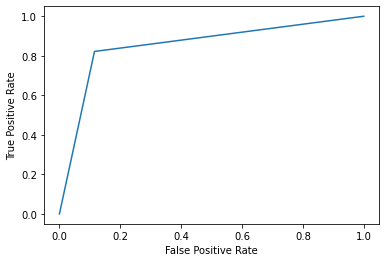

In [90]:
fpr, tpr, _ = metrics.roc_curve(y_test,  r_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Bagging

In [91]:
bg=BaggingClassifier(base_estimator=k1,n_estimators=10,random_state=55)
bg.fit(x_train,y_train)
b_pred=bg.predict(x_test)
b_ac=accuracy_score(y_test,b_pred)*100
b_cr=classification_report(y_test,b_pred)
b_cm=confusion_matrix(y_test,b_pred)
print("Ensemble_ac:",b_ac.round(2))
print("Ensemble_report:",b_cr)
print("Ensemble_matrix:",b_cm)

Ensemble_ac: 81.75
Ensemble_report:               precision    recall  f1-score   support

           0       0.80      0.83      0.82       599
           1       0.83      0.80      0.82       623

    accuracy                           0.82      1222
   macro avg       0.82      0.82      0.82      1222
weighted avg       0.82      0.82      0.82      1222

Ensemble_matrix: [[500  99]
 [124 499]]


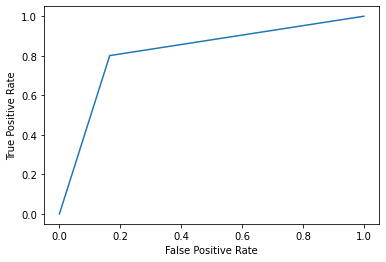

In [92]:
fp, tp, _ = metrics.roc_curve(y_test,  b_pred)

#create ROC curve
plt.plot(fp,tp)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()